In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, ndimage
from scipy.optimize import curve_fit

from config import props, filenames

In [2]:
current = pd.read_csv(filenames.data+'example_period.csv')
prc = pd.read_csv(filenames.data+'prc.csv')
prc['norm_response'] = prc.response/props.pert_strength

In [3]:
def gaussian(x, h, m, s):
    d = np.minimum(np.abs(x-m), 1-np.abs(x-m))
    return h*np.exp(-d**2/(2*s))

def curve(x, h1, m1, s1, h2, m2, s2):
    return gaussian(x, h1, m1, s1) + gaussian(x, h2, m2, s2)

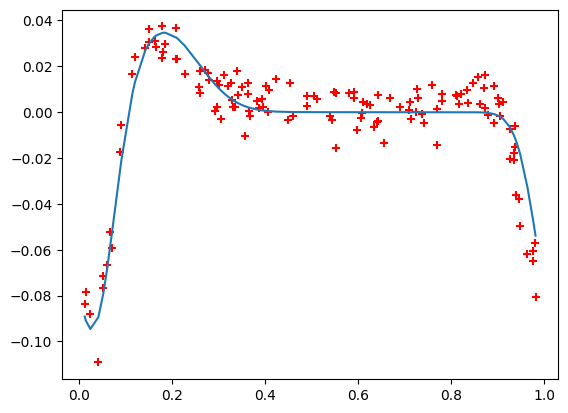

In [4]:
initial_guess = (0.035, 0.18, 0.006, -0.1, 0.03, 0.002)
plt.figure()
plt.plot(prc.phase, curve(prc.phase, *initial_guess))
plt.scatter(prc.phase, prc.norm_response, marker='+', c='r')

In [5]:
popt, popc = curve_fit(curve, prc.phase, prc.norm_response, initial_guess)

In [6]:
def fitted_prc(x):
    return curve(x%1, *popt)

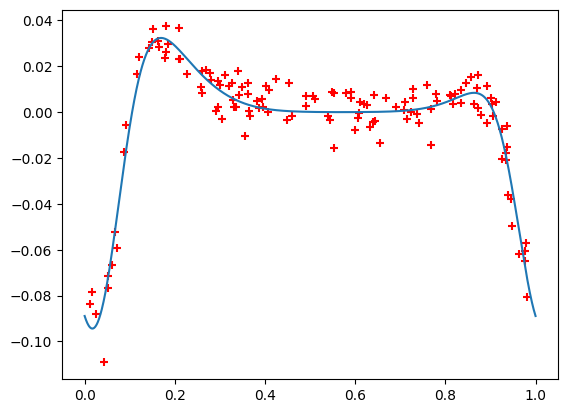

In [7]:
plt.scatter(prc.phase, prc.norm_response, marker='+', c='r')
plt.plot(np.linspace(0, 1, 1000), curve(np.linspace(0, 1, 1000), *popt), zorder=10)

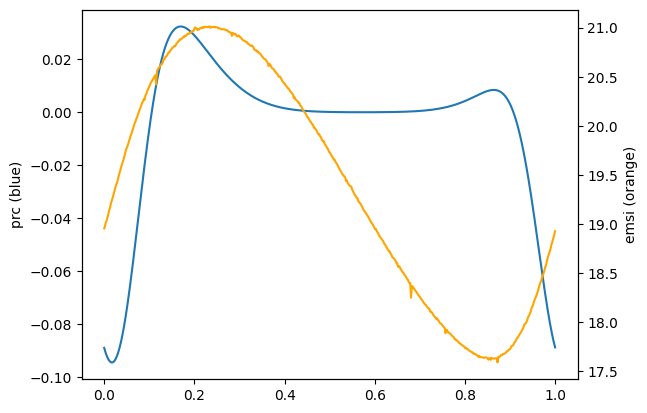

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(current.phase, fitted_prc(current.phase))
ax1.set_ylabel('prc (blue)')
ax2.plot(current.phase, current.emsi, c='orange')
ax2.set_ylabel('emsi (orange)')
plt.show()

In [9]:
effect = np.zeros(1000)
for i, d in enumerate(np.arange(-0.5, 0.5, 0.001)):
    effect[i] = np.sum(-fitted_prc(np.array(current.phase+d)%1) * current.I)/1000

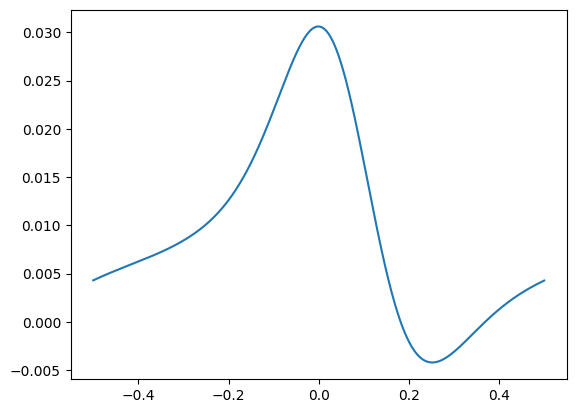

In [10]:
plt.plot(np.arange(-0.5, 0.5, 0.001), effect)

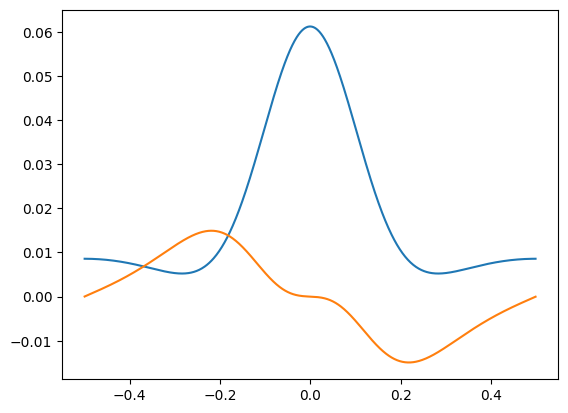

In [11]:
plt.plot(np.arange(-0.5, 0.5, 0.001), effect + effect[::-1])
plt.plot(np.arange(-0.5, 0.5, 0.001), effect-effect[::-1])